In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2


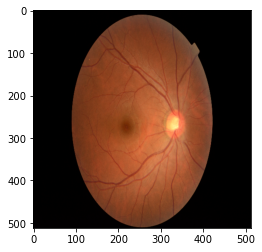

In [2]:
img=cv2.imread("pre_pro_img/1_orignal.png")
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img= cv2.resize(img, (512,512))
plt.imshow(img)

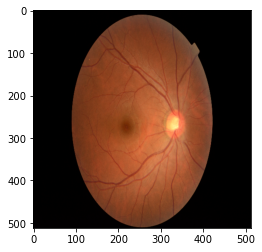

In [3]:
img_norm=cv2.normalize(img,None,alpha=0,beta=255,norm_type=cv2.NORM_MINMAX)
cv2.imwrite("pre_pro_img/2_normalized.png",img_norm)
plt.imshow(img_norm)

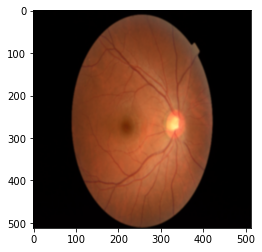

In [4]:
img_denoised = cv2.GaussianBlur(img,(7,7),0)
cv2.imwrite("pre_pro_img/3_noised.png",img_denoised)
plt.imshow(img_denoised)

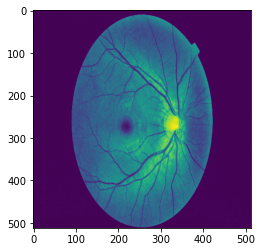

In [5]:
b,gr,r = cv2.split(img)
clahe = cv2.createCLAHE(clipLimit = 3)
claheim = clahe.apply(gr)
cv2.imwrite("pre_pro_img/4_claheim.png",claheim)
plt.imshow(claheim)

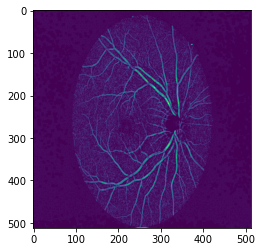

In [6]:
filterSize =(5, 5)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,filterSize)
tophat = cv2.morphologyEx(claheim,cv2.MORPH_BLACKHAT,kernel)
cv2.imwrite("pre_pro_img/5_tophat.png",tophat)
plt.imshow(tophat)

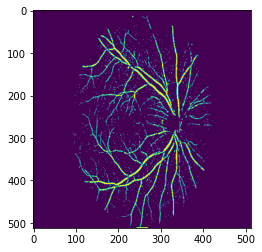

In [7]:
ret, thresh1 = cv2.threshold(tophat, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imwrite("pre_pro_img/6_threshold.png",thresh1)
plt.imshow(thresh1)

In [8]:
filterSize =(5, 5)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,filterSize)
morph = cv2.morphologyEx(thresh1,cv2.MORPH_BLACKHAT,kernel)
# Use connected components to measure the diameter of each artery
_, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh1, connectivity=8)
min_diameter=40
m=0
for i, stat in enumerate(stats[1:], start=1):
    diameter = np.sqrt(stat[4]/np.pi)*2
    if diameter < min_diameter:
        labels[labels == i] = 0
    else:
        m=max(m,diameter) 
print("The maximum diameter of artery is :",m)

The maximum diameter of artery is : 69.22769421541608
